# <center>Построение пуассоновской регрессии

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Чтение и подготовка данных

Рассмотрим данные о количестве велосипедистов. Количество велосипедистов зависит от погодных условий в рассматриваемый день: чем хуже погода, тем меньше желающих. В качестве признаков возьмем:
- максимальную температуру в рассматриваемый день (F);
- минимальную температуру в рассматриваемый день (F);
- количество осадков.

In [2]:
data = pd.read_csv('data/nyc_bicyclist_counts.csv', index_col=['Date'], parse_dates=True)

In [3]:
data.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT
Date,,,,
2017-04-01,46.0,37.0,0.00,606
2017-04-02,62.1,41.0,0.00,2021
2017-04-03,63.0,50.0,0.03,2470
2017-04-04,51.1,46.0,1.18,723
2017-04-05,63.0,46.0,0.00,2807


Целевая переменная &ndash; `'BB_COUNT'` &ndash; содержит только целые положительные числа, что должно быть учтено при выборе предсказательной модели.

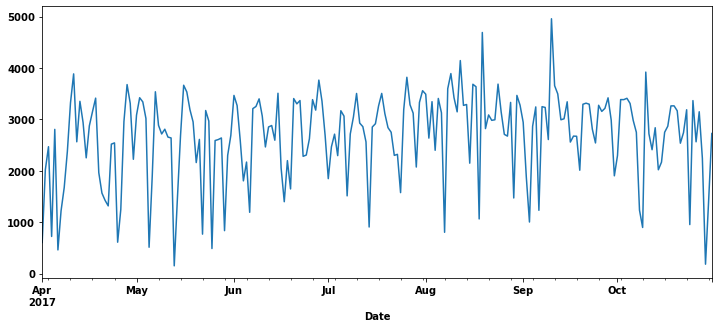

In [4]:
data['BB_COUNT'].plot(figsize=(12,5))
plt.show()

Кроме указанных факторов, количество велосипедистов может зависеть от дня недели: в выходные количество желающих больше, нежели в будни. Также может оказаться важным месяц. Добавим столбцы, содержащие информацию о том, на какой день недели и на какой месяц приходится наблюдение:

In [5]:
data['DAY_OF_WEEK'] = data.index.dayofweek
data['MONTH'] = data.index.month

Данные переменные являются категориальными.

<div class="alert alert-info">

<h3> Задание 1</h3>
<p></p>
<ul>1. Определите функцию, которая принимает на вход исходные данные $(X,y)$ и параметры модели $\theta$. Данная функция должна возвращать среднеквадратичную ошибку модели.</ul>
    
<ul>2. Определите аналогичную функцию, которая возвращает значение функционала качества пуассоновской регрессии.</ul>  
    
<ul>3. Обучите обе модели с помощью функции minimize из SciPy. Сравните качество аппроксимации моделей. Метрикой качества выберите среднюю абсолютную ошибку.</ul>    
 
<ul>4. Отобразите на графике исходный ряд и результаты аппроксимации линейной и пуассоновской регрессиями.</ul>
<p></p>   

<p></p>
</div>

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.compose import TransformedTargetRegressor
from scipy.optimize import minimize
from sklearn.metrics import mean_absolute_error

In [7]:
X = data.drop('BB_COUNT', axis=1)
Y = data['BB_COUNT']
X['count']=1
teta0=np.zeros(X.shape[1])

1. Определите функцию, которая принимает на вход исходные данные  (𝑋,𝑦)  и параметры модели  𝜃 . Данная функция должна возвращать среднеквадратичную ошибку модели.

In [8]:
def MSE(y, x,teta):
    return np.mean((y-np.dot(x,teta))**2)

2. Определите аналогичную функцию, которая возвращает значение функционала качества пуассоновской регрессии.

In [9]:
def logLLF_Poisson(y, x,teta):
    teta_x=np.dot(x,teta)
    return np.mean(np.exp( teta_x)- y*teta_x)

3. Обучите обе модели с помощью функции minimize из SciPy. Сравните качество аппроксимации моделей. Метрикой качества выберите среднюю абсолютную ошибку.

In [10]:
result = minimize(lambda teta: MSE(Y, X, teta), tuple(teta0))
teta=result.x

In [11]:
y_pred_mse=np.dot(X,teta)

In [12]:
mean_absolute_error(Y,y_pred_mse)

436.4798058149322

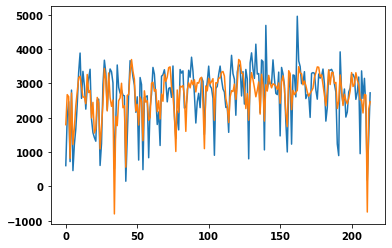

In [13]:
plt.plot(Y.values)
plt.plot(y_pred_mse)
plt.show()


In [14]:
result2 = minimize(lambda teta: logLLF_Poisson(Y, X, teta), tuple(teta0))
teta=result2.x

In [15]:
y_pred_logLLF=np.exp(np.dot(X,teta))

In [16]:
mean_absolute_error(Y,y_pred_logLLF)

419.028099736072

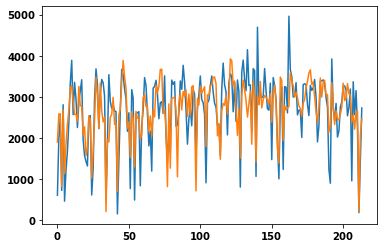

In [17]:
plt.plot(Y.values)
plt.plot(y_pred_logLLF)
plt.show()

4. Отобразите на графике исходный ряд и результаты аппроксимации линейной и пуассоновской регрессиями.

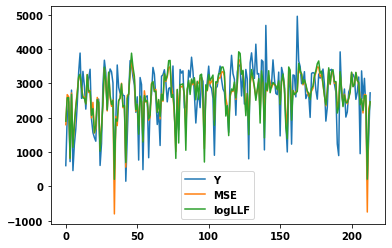

MAE MSE: 436.4798058149322
MAE logLLF: 419.028099736072


In [18]:
plt.plot(Y.values, label="Y")
plt.plot(y_pred_mse, label="MSE")
plt.plot(y_pred_logLLF, label="logLLF")
plt.legend()
plt.show()
print("MAE MSE:",mean_absolute_error(Y,y_pred_mse))
print("MAE logLLF:",mean_absolute_error(Y,y_pred_logLLF))

<div class="alert alert-info">

<h3> Задание 2</h3>
<p></p>
<ul>Линейные модели чувствительны к виду категориальных признаков. Преобразуйте категориальные признаки с помощью One Hot Encoding и повторите шаги 3-4 из задания 1. Как изменилось качество моделей?</ul>
<p></p>
</div>

In [19]:
X_OHE = pd.get_dummies(X, columns=['DAY_OF_WEEK', 'MONTH'])
teta0=np.zeros(X_OHE.shape[1])

In [20]:
result = minimize(lambda teta: MSE(Y, X_OHE, teta), tuple(teta0))
teta=result.x
y_pred_mse=np.dot(X_OHE,teta)

In [21]:
result2 = minimize(lambda teta: logLLF_Poisson(Y, X_OHE, teta), tuple(teta0))
teta=result2.x
y_pred_logLLF=np.exp(np.dot(X_OHE,teta))

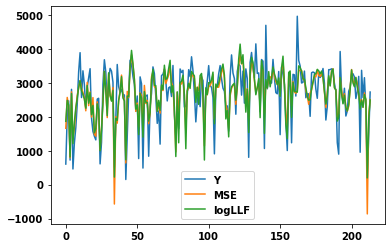

MAE MSE: 407.03593580155587
MAE logLLF: 395.3976717891568


In [22]:
plt.plot(Y.values, label="Y")
plt.plot(y_pred_mse, label="MSE")
plt.plot(y_pred_logLLF, label="logLLF")
plt.legend()
plt.show()
print("MAE MSE:",mean_absolute_error(Y,y_pred_mse))
print("MAE logLLF:",mean_absolute_error(Y,y_pred_logLLF))

<div class="alert alert-info">

<h3> Задание 3</h3>
<p></p>
<ul>Преобразуйте категориальные признаки с помощью Фурье-разложения и повторите шаги 3-4 из задания 1. Какого качества моделей удалось достичь?</ul>
<p></p>
</div>

In [23]:
X_FUR=X
X_FUR['SIN(DAY_OF_WEEK)']=np.sin(2*np.pi*(X_FUR['DAY_OF_WEEK']-1)/7)
X_FUR['COS(DAY_OF_WEEK)']=np.cos(2*np.pi*(X_FUR['DAY_OF_WEEK']-1)/7)

X_FUR['SIN(MONTH)']=np.sin(2*np.pi*(X_FUR['MONTH']-1)/12)
X_FUR['COS(MONTH)']=np.cos(2*np.pi*(X_FUR['MONTH']-1)/12)

X_FUR=X_FUR.drop(['DAY_OF_WEEK', 'MONTH'], axis = 1)
teta0=np.zeros(X_FUR.shape[1])

In [24]:
result = minimize(lambda teta: MSE(Y, X_FUR, teta), tuple(teta0))
teta=result.x
y_pred_mse=np.dot(X_FUR,teta)

In [25]:
result2 = minimize(lambda teta: logLLF_Poisson(Y, X_FUR, teta), tuple(teta0))
teta=result2.x
y_pred_logLLF=np.exp(np.dot(X_FUR,teta))

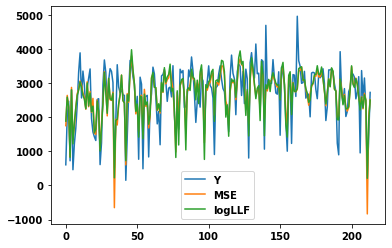

MAE MSE: 417.9930893753448
MAE logLLF: 405.00083232678327


In [26]:
plt.plot(Y.values, label="Y")
plt.plot(y_pred_mse, label="MSE")
plt.plot(y_pred_logLLF, label="logLLF")
plt.legend()
plt.show()
print("MAE MSE:",mean_absolute_error(Y,y_pred_mse))
print("MAE logLLF:",mean_absolute_error(Y,y_pred_logLLF))